# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib

# Data Acquisition

In [2]:
# Reading data from CSV files
df = pd.read_csv("Absenteeism_at_work.csv", sep=';') 
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
# Formatting columns names to replace spaces with underscore for easier reference
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")

In [4]:
# Displaying the central tendancies for the data
df.describe(include='all')

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


# Data Preprocessing

In [5]:
# checking for null values
df.isna().sum()

id                                 0
reason_for_absence                 0
month_of_absence                   0
day_of_the_week                    0
seasons                            0
transportation_expense             0
distance_from_residence_to_work    0
service_time                       0
age                                0
work_load_average/day              0
hit_target                         0
disciplinary_failure               0
education                          0
son                                0
social_drinker                     0
social_smoker                      0
pet                                0
weight                             0
height                             0
body_mass_index                    0
absenteeism_time_in_hours          0
dtype: int64

## Outlire - Boxplot

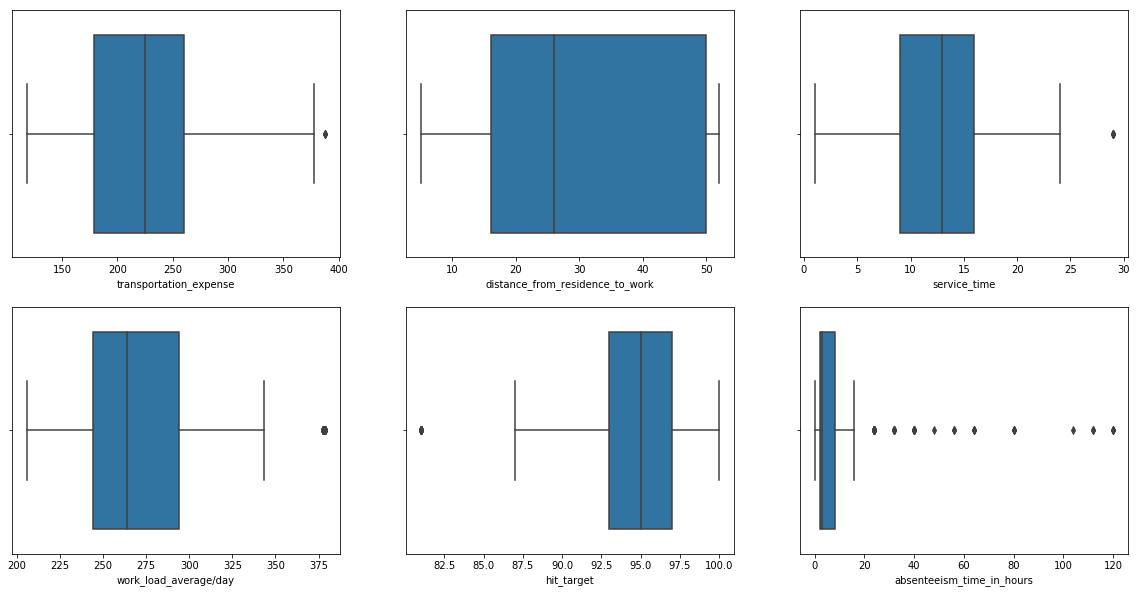

In [6]:
fig, axes = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(20)

sns.boxplot(x='transportation_expense', data=df, ax=axes[0][0])
sns.boxplot(x='distance_from_residence_to_work', data=df, ax=axes[0][1])
sns.boxplot(x='service_time', data=df, ax=axes[0][2])
sns.boxplot(x='work_load_average/day', data=df, ax=axes[1][0])
sns.boxplot(x='hit_target', data=df, ax=axes[1][1])
sns.boxplot(x='absenteeism_time_in_hours', data=df, ax=axes[1][2])

## Remove outlires

In [7]:
# As per the identifications in above box plot, outliers have been idenfied and dropping with below conditions.
# 1) absenteeism_time_in_hours => 24
# 2) work_load_average/day > 350
# 3) hit_target < 85
# 4) transportation_expense > 380
# 5) service_time > 25

df = df.drop(index = df[df.absenteeism_time_in_hours >= 24].index).reset_index(drop=True)
df = df.drop(index = df[df['work_load_average/day'] > 350].index).reset_index(drop=True)
df = df.drop(index = df[df.hit_target < 85].index).reset_index(drop=True)
df = df.drop(index = df[df.transportation_expense > 380].index).reset_index(drop=True)
df = df.drop(index = df[df.service_time > 25].index).reset_index(drop=True)

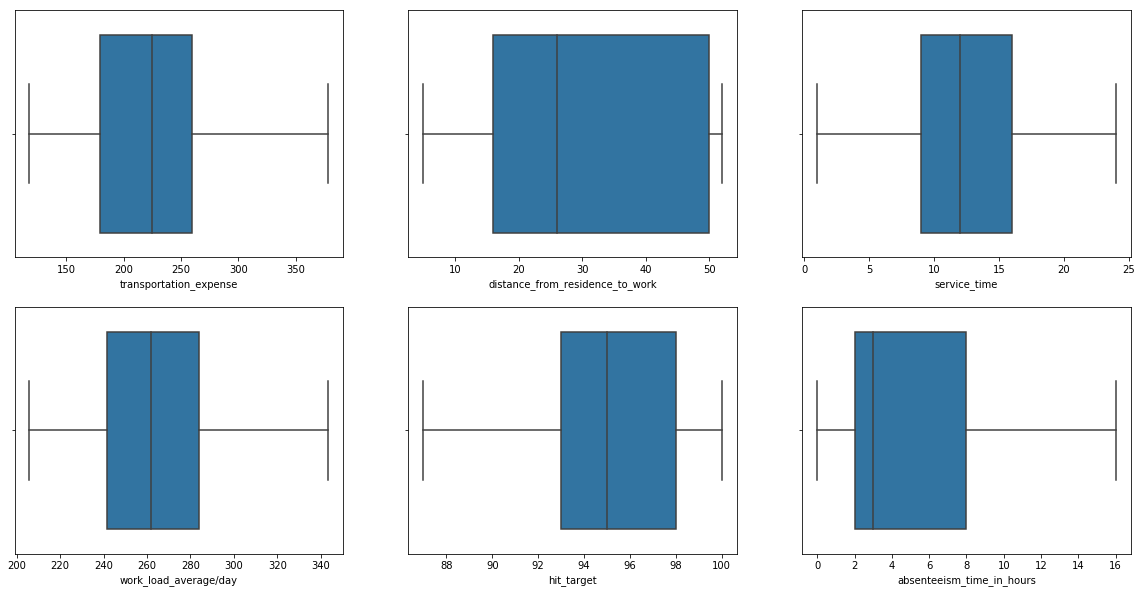

In [8]:
fig, axes = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(20)

sns.boxplot(x='transportation_expense', data=df, ax=axes[0][0])
sns.boxplot(x='distance_from_residence_to_work', data=df, ax=axes[0][1])
sns.boxplot(x='service_time', data=df, ax=axes[0][2])
sns.boxplot(x='work_load_average/day', data=df, ax=axes[1][0])
sns.boxplot(x='hit_target', data=df, ax=axes[1][1])
sns.boxplot(x='absenteeism_time_in_hours', data=df, ax=axes[1][2])


In [ ]:
# Check dataset
df.shape

(646, 21)

## Data visualization with bar graph

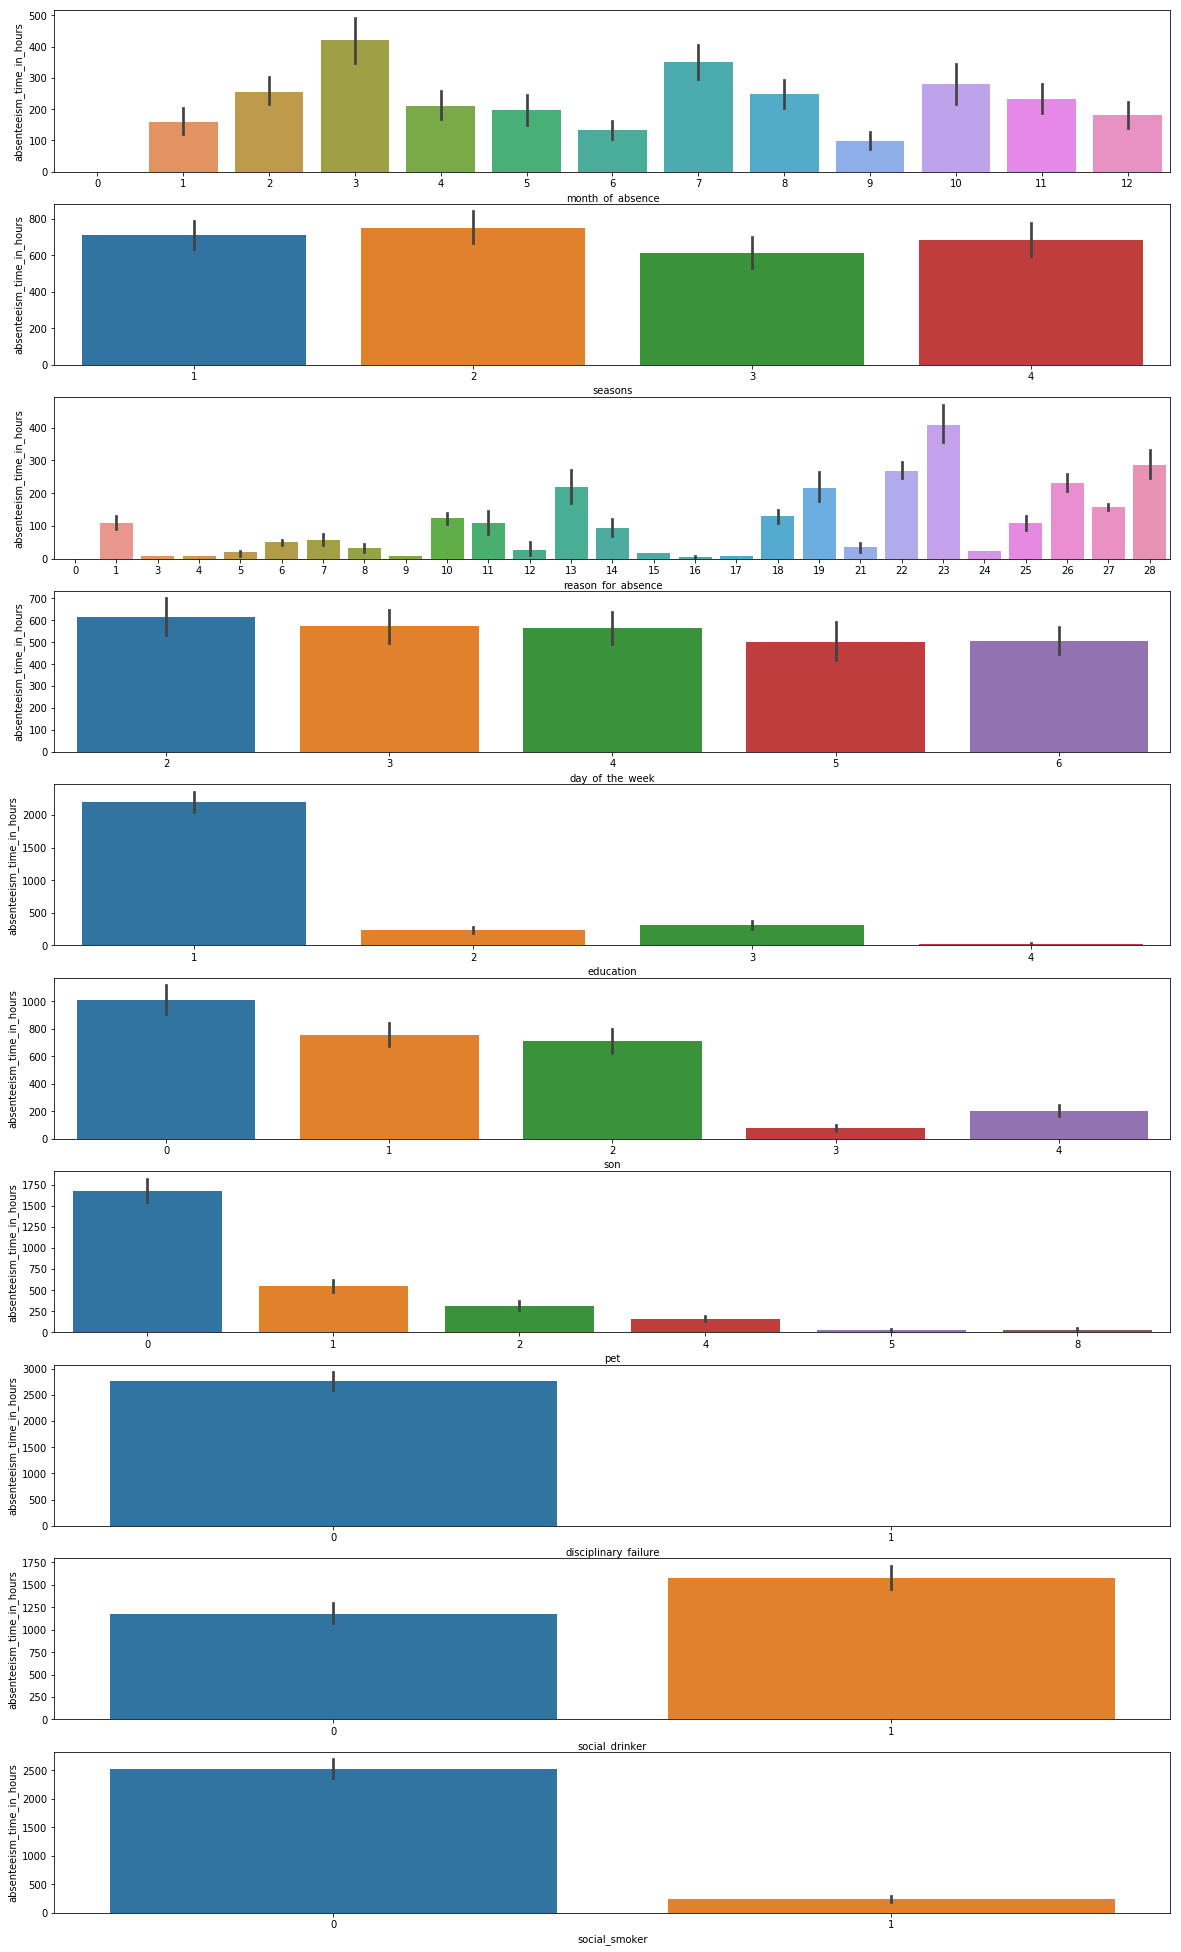

In [ ]:
fig, axes = plt.subplots(10, 1)
fig.set_figheight(35)
fig.set_figwidth(20)

# For categorical columns
sns.barplot(x='month_of_absence',y='absenteeism_time_in_hours',data=df,estimator=np.sum, ax=axes[0])
sns.barplot(x='seasons',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[1])
sns.barplot(x='reason_for_absence',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[2])
sns.barplot(x='day_of_the_week',y='absenteeism_time_in_hours',data=df,estimator=np.sum, ax=axes[3])
sns.barplot(x='education',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[4])
sns.barplot(x='son',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[5])
sns.barplot(x='pet',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[6])

# For boolean columns
sns.barplot(x='disciplinary_failure',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[7])
sns.barplot(x='social_drinker',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[8])
sns.barplot(x='social_smoker',y='absenteeism_time_in_hours',data=df,estimator=np.sum,ax=axes[9])

In [ ]:
# As the absenteen hour cannot be more than 24 per day thefore removing
# The records where hour is more than 24
df = df.drop(df[df.absenteeism_time_in_hours > 24].index).reset_index(drop = True)

In [ ]:
# As the data set have months till 12 therefore month 0 is invalid
# Therefore removing records for month 0
df = df.drop(df[df.month_of_absence == 0].index).reset_index(drop = True)

In [ ]:
# There is no feature in the dataset which can clearly identify duplicate therefore commenting
# df = df.drop(df[df.duplicated(subset=None, keep='first')].index).reset_index(drop = True)


In [ ]:
# As the dataset has a derived attribute BMI which depends on person's height and weight therefore
# We can remove the attributes height and weight
df = df.drop(['weight', 'height'], axis=1)

## Heatmap of the scaled  and encoded data

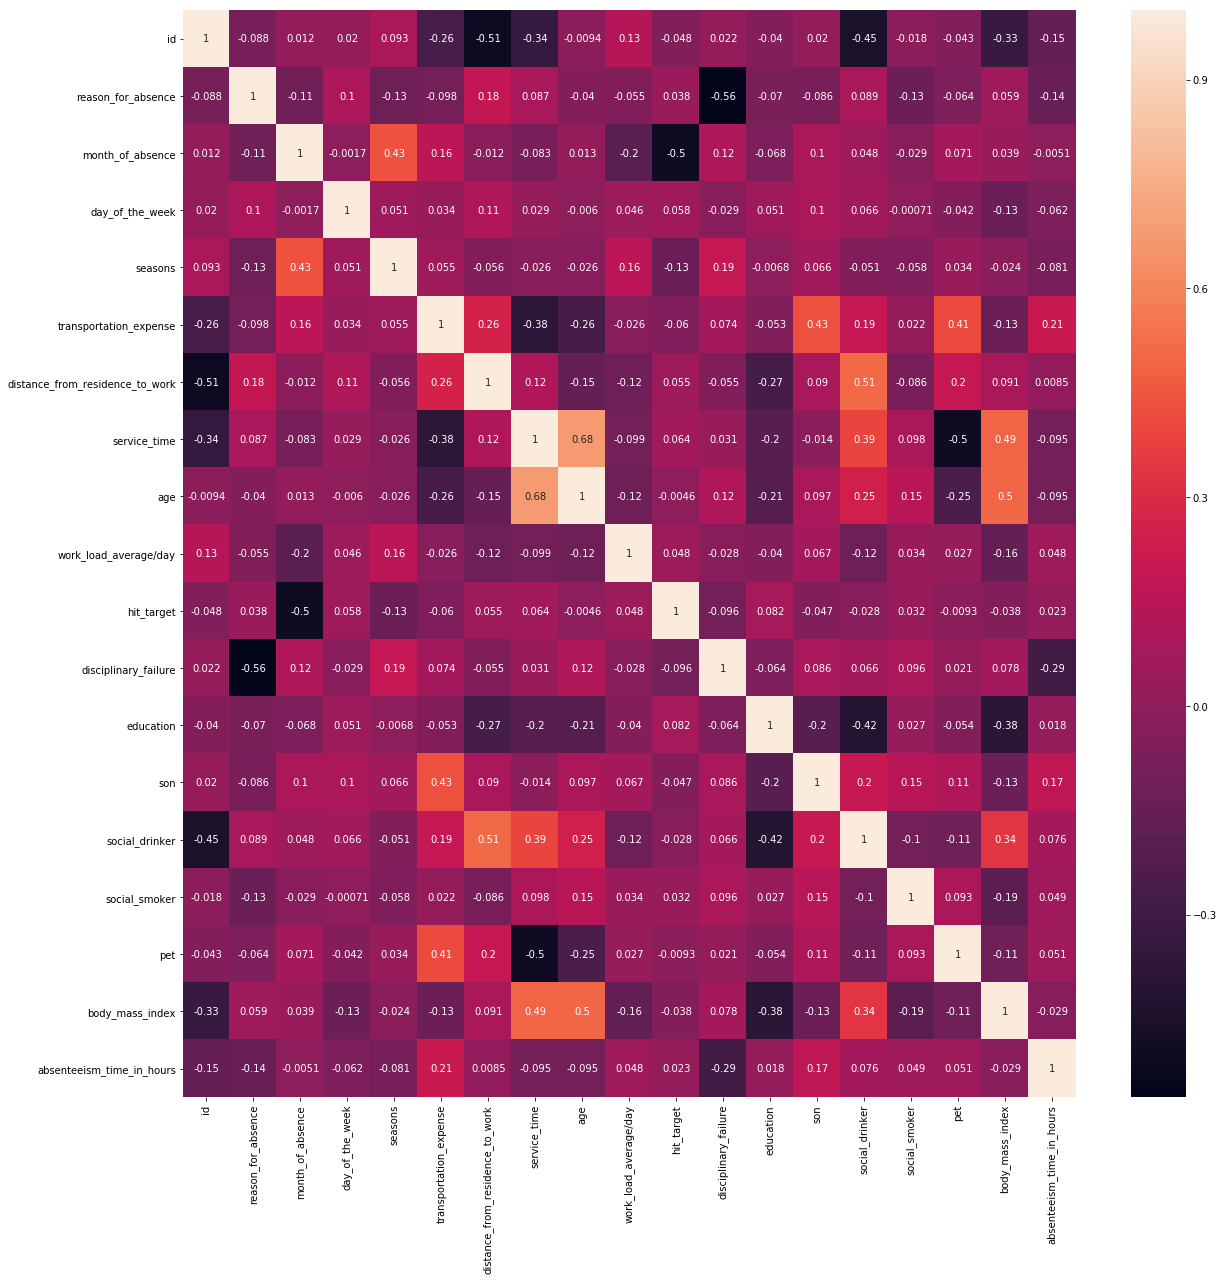

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20)) 
sns.heatmap(df.corr(), annot = True, ax = ax)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 19 columns):
id                                 643 non-null int64
reason_for_absence                 643 non-null int64
month_of_absence                   643 non-null int64
day_of_the_week                    643 non-null int64
seasons                            643 non-null int64
transportation_expense             643 non-null int64
distance_from_residence_to_work    643 non-null int64
service_time                       643 non-null int64
age                                643 non-null int64
work_load_average/day              643 non-null float64
hit_target                         643 non-null int64
disciplinary_failure               643 non-null int64
education                          643 non-null int64
son                                643 non-null int64
social_drinker                     643 non-null int64
social_smoker                      643 non-null int64
pet                          

## Pairplot of the data

In [ ]:
g = sns.pairplot(df, vars = ['transportation_expense', 'distance_from_residence_to_work', 'service_time',
                             'age', 'work_load_average/day', 'hit_target', 'disciplinary_failure', 'education',
                             'son', 'social_drinker', 'social_smoker', 'pet', 'body_mass_index',
                             'absenteeism_time_in_hours'])

## Encoding categorical data

In [ ]:
# As the data contains categorical feature due to which if we perform the analysis directly it will be of no use
# And therefore we are performing onehot encoding on the categorical columns

columns_to_encode = ['seasons', 'reason_for_absence', 'month_of_absence', 'day_of_the_week']

df = pd.get_dummies(df, columns = columns_to_encode, prefix = columns_to_encode)

df.head()

## Scaling data

In [ ]:
# Instantiate encoder/scaler
scaler = StandardScaler()

# Scale and Encode Separate Columns
scaled_data  = scaler.fit_transform(df) 
df.loc[:,:] = scaled_data[:,:]

df.head()

# Model Creation

In [ ]:
# Finding out the correlation of different features with Absenteeism in hours
df.corr().absenteeism_time_in_hours.sort_values()

In [ ]:
# Selecting the features with correlation +/- 0.1
df = df.loc[:,((df.corr().absenteeism_time_in_hours.sort_values() > 0.1) | (df.corr().absenteeism_time_in_hours.sort_values() < -0.1))]
df.info()

In [ ]:
# Diving the data in Dependent and Independent features
Y = df[['absenteeism_time_in_hours']]
X = df.drop(['absenteeism_time_in_hours', 'id'], axis=1)

In [ ]:
# Splitting data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3)
print( "\nX_train:\n")
print( X_train.shape)
X_train.head()

In [ ]:
print( "\nX_test:\n")
print( X_test.shape)
X_test.head()

In [ ]:
# Creating the linear Regression Model
lr = LinearRegression(normalize=True)
lr.fit(X_train,Y_train)

# Creating the linear Regression Model
ls = Lasso(alpha=0.01)
ls.fit(X_train,Y_train)

In [ ]:
# Testing the Model 
Y_pred = lr.predict(X_test)
YS_Pred = ls.predict(X_test)

# Calculating Root Mean Square Error
RMSE = np.sqrt(mean_squared_error(Y_pred, Y_test))
print('RMSE Linear Regression: ' + str(RMSE))


# R2 Score
R2score = r2_score(Y_test, Y_pred)
print('R2 score for Linear Regression: ' + str(R2score))


RS2score = r2_score(Y_test, YS_Pred)
print('R2 score for Lasso: '+ str(RS2score))

In [ ]:
# Displaying Linear Regression Coefficients
lr.coef_

In [ ]:
# Displaying the Intercept
lr.intercept_

In [ ]:
X.info()

In [ ]:
# Mapping categorical labels with actual values

X_Names = X.rename(columns={"reason_for_absence_0": "no_reson_provided", "reason_for_absence_1": "infectious_and_parasitic_diseases",
                       "reason_for_absence_10":"diseases_of_the_respiratory_system", "reason_for_absence_13":"diseases_of_the_musculoskeletal_system_and_connective_tissue",
                       "reason_for_absence_18": "symptoms_signs_and_abnormal_clinical_and_laboratory_findings_not_elsewhere_classified",
                       "reason_for_absence_19": "injury_poisoning_and_certain_other_consequences_of_external_causes",
                       "reason_for_absence_22": "patient follow-up", "reason_for_absence_23": "medical_consultation", "reason_for_absence_26": "unjustified_absence",
                       "reason_for_absence_27": "physiotherapy", "reason_for_absence_28": "dental_consultation", "month_of_absence_3": "march", "month_of_absence_7": "july"})
X_Names.columns

In [ ]:
# Plotting importance of features

coef = pd.Series(lr.coef_[0], index = X_Names.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (14.0, 14.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")